# 2. Lagrange polynomials

Given $n+1$ points $(x_0, f(x_0)), \dots, (x_N, f(x_N))$

$$
P(x) = \sum_{i=0}^{N} l_i(x) \cdot f(x_i)
$$

$$
l_i(x) = \prod_{\substack{0 \leq j \leq N \\ j \ne i}} \frac{x - x_j}{x_i - x_j}
$$

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def Ln(N, M, x, xx, f):
    """
    Compute Lagrange basis polynomials l_i(x) for i = 0 to N, and evaluate the interpolated polynomial.

    Parameters:
        N  : int
            Degree of the interpolation polynomial (number of nodes = N + 1)
        M  : int
            Number of evaluation points (length of xx)
        x  : numpy array, shape (N+1,)
            Interpolation nodes (x_0, x_1, ..., x_N)
        xx : numpy array, shape (M,)
            Points at which the basis polynomials and interpolated polynomial will be evaluated
        f  : function
            Function to be interpolated. Should accept a scalar input and return a scalar output.
        
    Returns:
        fN : numpy array, shape (M,)
            Values of the interpolated polynomial at points xx
        ln : numpy array, shape (N+1, M)
            Each row i contains the values of the i-th Lagrange basis polynomial l_i(xx)
    """

    # basis polynomials
    ln = np.zeros((N+1, M))  # Initialize result array
    for i in range(N+1):
        ln[i, :] = 1  # Start with multiplicative identity
        for j in range(N+1):
            if i != j:
                # Compute the product term for L_i(x):
                # L_i(x) = product over j ≠ i of (x - x_j) / (x_i - x_j)
                ln[i, :] *= (xx - x[j]) / (x[i] - x[j])
    
    # Sum of the basis polynomials times the function values
    fN = np.zeros(M)
    for i in range(N+1):
        fN += ln[i, :] * f[i]

    return fN, ln

## Example : $y=\sin(\pi x)$

In [40]:
goal_function = lambda x : np.sin(np.pi*x)

# Exact function
M = 1000
xi = np.linspace(-1,1,M)
fexact = goal_function(xi)

# Known data given at N points
N = 10
x = np.linspace(-1,1,N+1)
f = goal_function(x)

# Compute the Lagrange polynomials for getting the approximation of the exact function
# Using the known data, we can compute the Lagrange polynomials of order N at M points xi
fN, ln = Ln(N, M, x, xi, f)

## Get the basis of Lagrange polynomial

Each Lagrange basis polynomial satisfies:

$$
l_i(x_j) = 
\begin{cases}
1 & \text{if } i = j \\
0 & \text{if } i \ne j
\end{cases}
$$

That is, $l_i(x_i) = 1$ and $l_i(x_j) = 0$ for $j \ne i$.

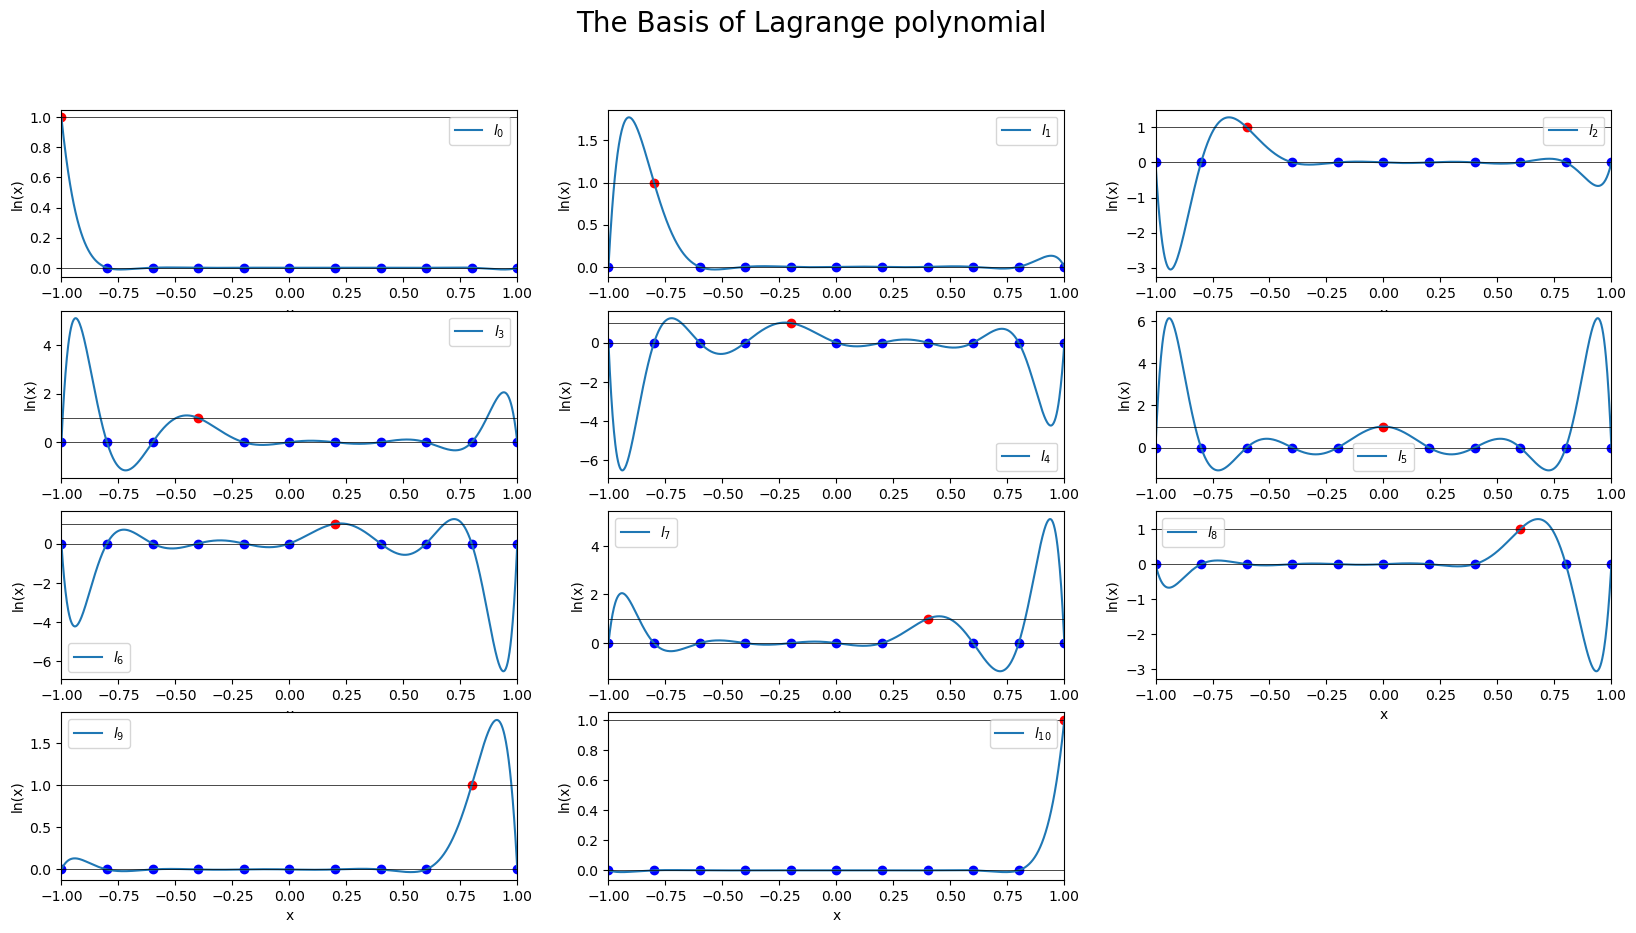

In [41]:
plt.figure(figsize=(20, 5 * int((N + 1) / 4)))
plt.suptitle('The Basis of Lagrange polynomial', fontsize=20)

# Loop over each basis polynomial l_i
for i in range(N + 1):
    # Create a subplot for each basis function
    plt.subplot(4, int((N + 1) / 4) + 1, i + 1)
    
    # Plot the i-th Lagrange basis polynomial
    plt.plot(xi, ln[i], label=fr"$l_{{{i}}}$")
    
    plt.xlabel('x')
    plt.ylabel('ln(x)')
    plt.xlim(-1, 1)
    plt.legend()
    
    # Mark the point where l_i(x_i) = 1 with a red dot
    plt.scatter(x[i], 1, color='red')
    
    # Draw horizontal lines at y = 1 and y = 0 for reference
    plt.hlines(1, -1, 1, color='black', linewidth=0.5)
    plt.hlines(0, -1, 1, color='black', linewidth=0.5)
    
    # Mark the other interpolation nodes (where l_i = 0) with blue dots
    for j in range(N + 1):
        if j != i:
            plt.scatter(x[j], 0, color='blue')

# Display all subplots
plt.show()

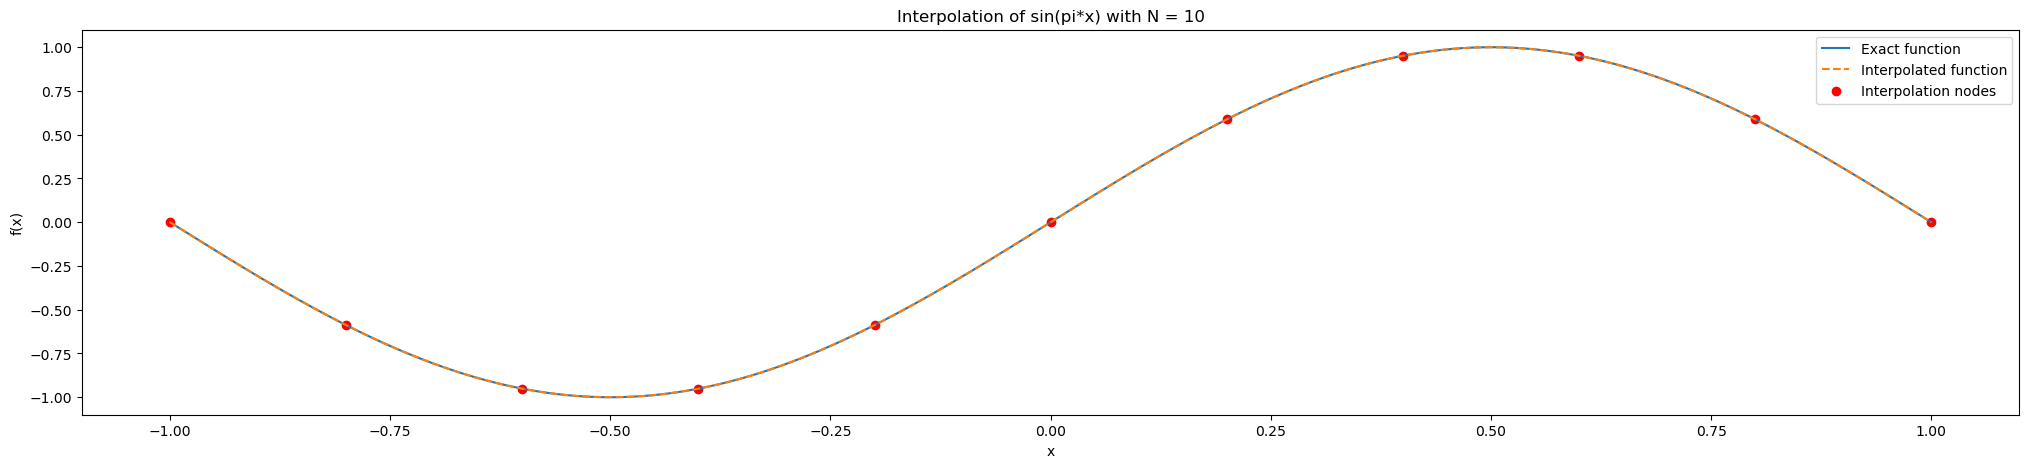

In [42]:
plt.figure(figsize=(25, 5))
plt.plot(xi, fexact, label='Exact function')
plt.plot(xi, fN, label='Interpolated function', linestyle='--')
plt.scatter(x, f, color='red', label='Interpolation nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Interpolation of sin(pi*x) with N = {N}')
plt.legend()
plt.show()

### Error of Lagrange Interpolation

We approximate the function:

$$
f(x) = \sin(\pi x), \quad x \in [-1, 1]
$$

using Lagrange interpolation with equally spaced nodes. The error is defined as:

$$
\max_{x \in [-1,1]} \left| f(x) - P_N(x) \right|
$$

where $P_N(x)$ is the Lagrange interpolating polynomial of degree $N$ , evaluated over 1000 points.

#### Observation:

- The interpolation error **decreases exponentially** as $ N $ increases.
- Around $ N = 20 $, the error reaches a minimum close to **machine epsilon** (i.e., around $ 10^{-16} $), meaning the interpolation is nearly exact within floating-point precision.
- After that, the error slightly increases again due to **accumulated floating-point round-off errors** in high-degree polynomial evaluation and arithmetic.

#### Conclusion:

- This is because $\sin(\pi x)$  is smooth and well-behaved on $[-1, 1]$, so high-degree interpolation should theoretically work well.
- The observed error is instead due to **numerical issues**, not interpolation theory failure.


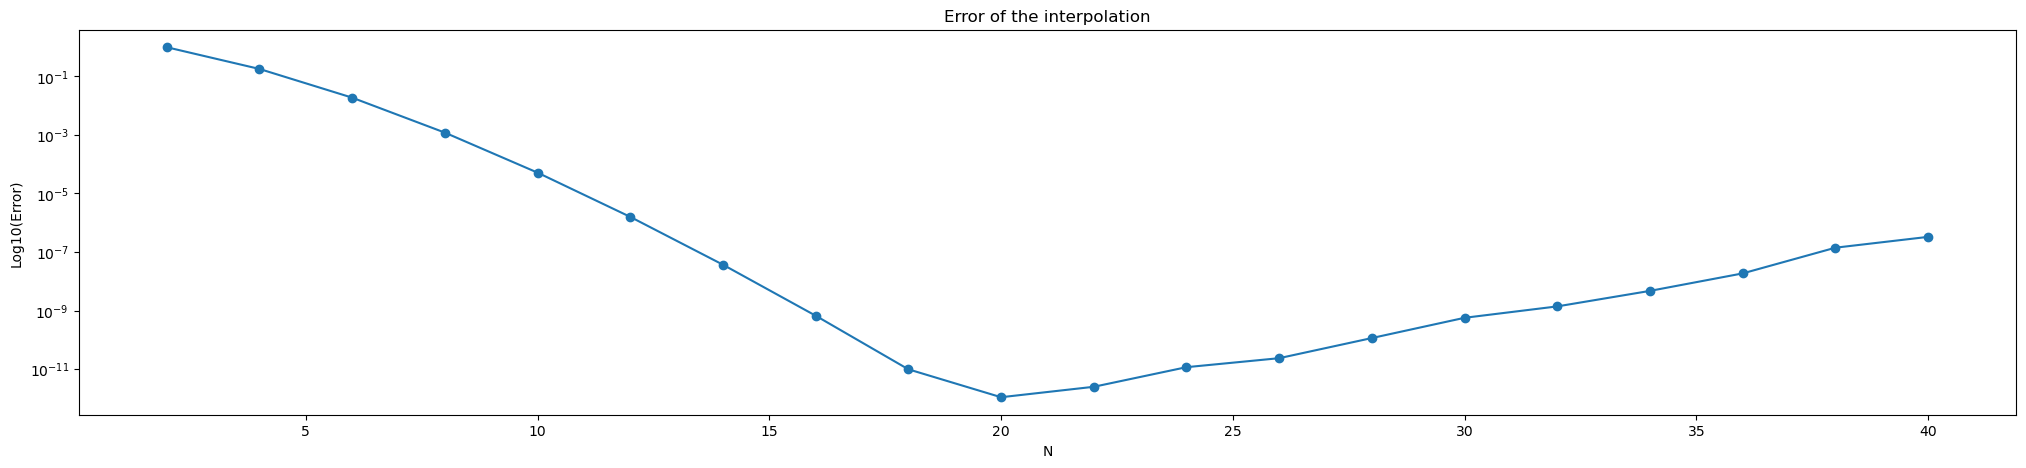

In [43]:
goal_function = lambda x : np.sin(np.pi*x)

# Exact function
M = 1000
xi = np.linspace(-1,1,M)
fexact = goal_function(xi)

N = 2
NN = []
Err = []

for i in range(20):
    x = np.linspace(-1,1,N+1)
    f = goal_function(x)
    
    fN, ln = Ln(N, M, x, xi, f)
    
    Lmax = max(fexact - fN)
    NN.append(N)
    Err.append(Lmax)
    N += 2

plt.figure(figsize=(25, 5))
plt.title('Error of the interpolation')
plt.plot((NN), Err, '-o')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Log10(Error)')
plt.show()

## Consider the Runge function

### Interpolation of Runge Function with Equally Spaced Nodes

We approximate the **Runge function**:

$$
f(x) = \frac{1}{1 + 25x^2}, \quad x \in [-1, 1]
$$

using Lagrange interpolation with $N+1 = 11$ **equally spaced nodes**.

#### Observation:

- While the interpolation matches the exact function well near the center, large oscillations appear near the boundaries ($x \approx \pm1$).
- The interpolated polynomial significantly overshoots the exact function near the edges, despite passing through all the interpolation nodes.
- This is a classic example of **Runge's phenomenon**, which occurs when interpolating a function with **high curvature** using **equally spaced nodes** and a **high-degree polynomial**.

#### Cause:

- The Runge function has rapid variation near the boundaries.
- Equally spaced nodes cannot adequately capture this behavior without introducing instability in the polynomial.
- As $N$ increases, these oscillations typically become more severe, especially near the ends of the interval.

#### Conclusion:

- **High-degree interpolation with equally spaced nodes is not reliable** for the Runge function.
- To reduce the error and oscillation, consider using:
  - **Chebyshev nodes** (which are clustered more near the ends)
  - **Piecewise interpolation** (e.g., splines)

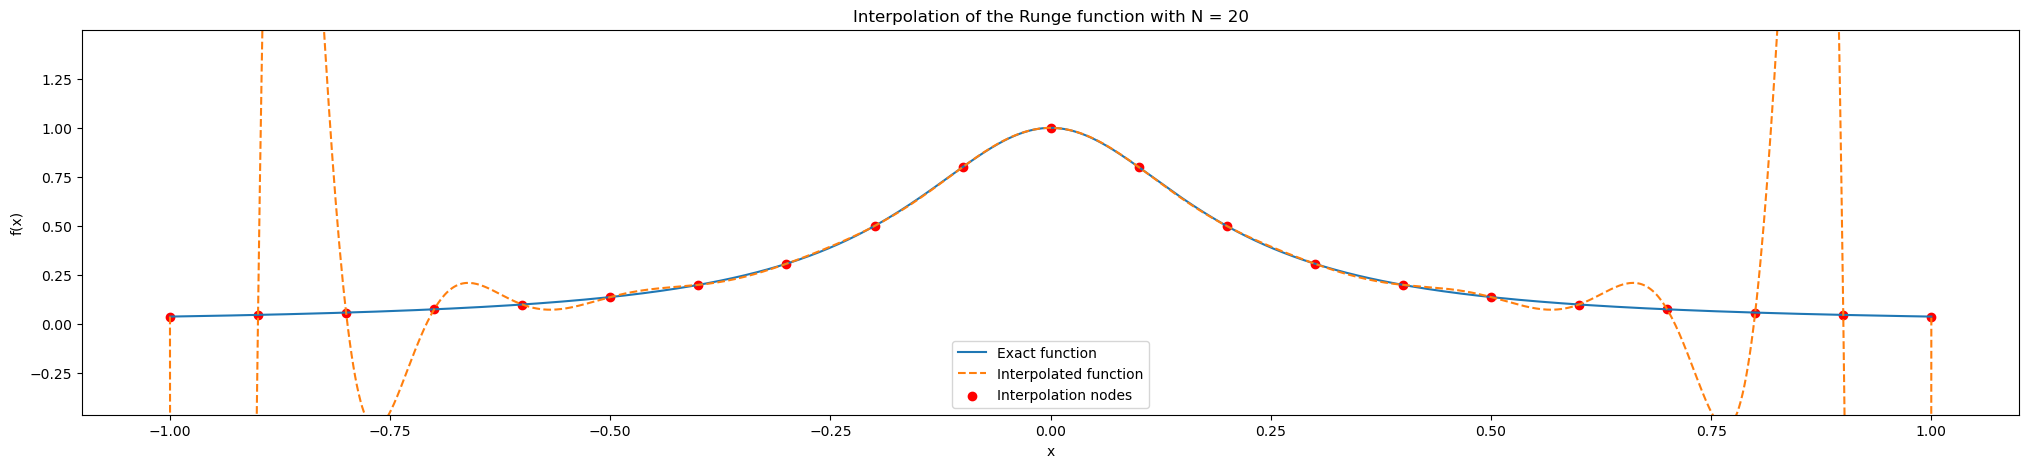

In [58]:
goal_function = lambda x : 1/(1 + 25*x**2)

# Exact function
M = 1000
xi = np.linspace(-1,1,M)
fexact = goal_function(xi)

# Known data given at N points
N = 20
x = np.linspace(-1,1,N+1)
f = goal_function(x)

# Compute the Lagrange polynomials for getting the approximation of the exact function
# Using the known data, we can compute the Lagrange polynomials of order N at M points xi
fN, ln = Ln(N, M, x, xi, f)

plt.figure(figsize=(25, 5))
plt.plot(xi, fexact, label='Exact function')
plt.plot(xi, fN, label='Interpolated function', linestyle='--')
plt.scatter(x, f, color='red', label='Interpolation nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(min(fexact) - 0.5, max(fexact) + 0.5)
plt.title(f'Interpolation of the Runge function with N = {N}')
plt.legend()
plt.show()

### Interpolation of Runge Function using Chebyshev Nodes

We approximate the **Runge function**:

$$
f(x) = \frac{1}{1 + 25x^2}, \quad x \in [-1, 1]
$$

using Lagrange interpolation with $N+1$ **Chebyshev nodes** instead of equally spaced nodes.

#### Chebyshev Nodes:

Chebyshev nodes are defined as:

$$
x_k = \cos\left( \frac{2k + 1}{2(N + 1)} \pi \right), \quad k = 0, 1, \dots, N
$$

These nodes are **densely packed near the endpoints**, which helps suppress large oscillations often seen in polynomial interpolation with equally spaced nodes (Runge's phenomenon).

#### Observation:

- The interpolated polynomial shows a **much better fit** to the Runge function across the entire interval.
- The large oscillations near the boundaries are **significantly reduced** compared to the case with equally spaced nodes.
- This shows that **Chebyshev nodes improve numerical stability and accuracy** for high-degree interpolation.

#### Conclusion:

- Chebyshev nodes are an effective alternative to equally spaced nodes, especially when interpolating functions with high curvature or rapid changes.
- They are a standard choice in **spectral methods** and **approximation theory** for global polynomial interpolation.


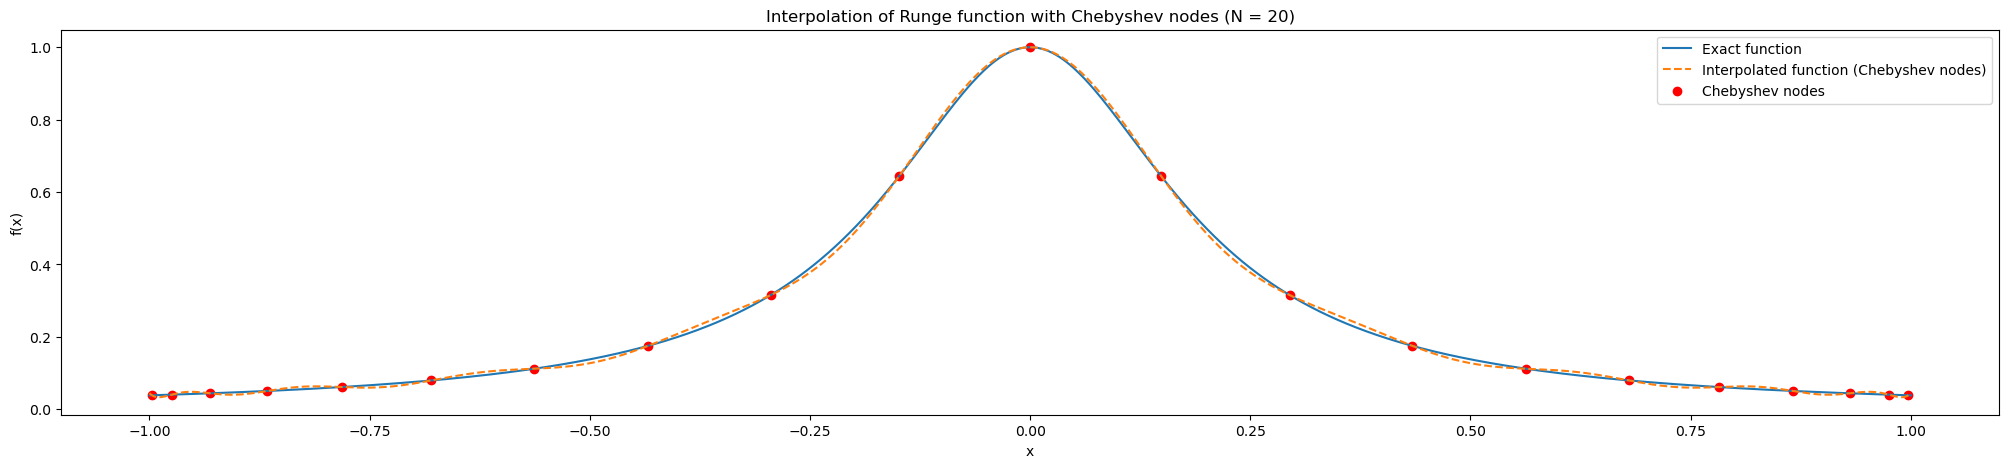

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Runge function
goal_function = lambda x: 1 / (1 + 25 * x**2)

# Evaluation points (for graph)
M = 1000
xi = np.linspace(-1, 1, M)
fexact = goal_function(xi)

# Degree of interpolation
N = 20

# Chebyshev nodes (mapped to [-1, 1])
i = np.arange(N + 1)
x_cheb = np.cos((2 * i + 1) / (2 * (N + 1)) * np.pi)  # in [-1, 1]
x_cheb = np.sort(x_cheb)  # Optional: sort for nicer plotting

# Function values at Chebyshev nodes
f_cheb = goal_function(x_cheb)

# Interpolation using Chebyshev nodes
fN_cheb, ln_cheb = Ln(N, M, x_cheb, xi, f_cheb)

# Plotting
plt.figure(figsize=(25, 5))
plt.plot(xi, fexact, label='Exact function')
plt.plot(xi, fN_cheb, '--', label='Interpolated function (Chebyshev nodes)')
plt.scatter(x_cheb, f_cheb, color='red', label='Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Interpolation of Runge function with Chebyshev nodes (N = {N})')
plt.legend()
plt.show()


## Consider the discontinuous function

### Interpolation of a Discontinuous Function using Lagrange Polynomial

We approximate the following **discontinuous step function**:

$$
f(x) =
\begin{cases}
1 & \text{if } x < 0 \\
-1 & \text{if } x \ge 0
\end{cases}
$$

using Lagrange interpolation with $N+1$ **equally spaced nodes** over $[-1, 1]$.

#### Observation:

- The interpolated function shows **severe oscillations** across the entire domain, especially near the discontinuity at $x = 0$.
- These oscillations are typical of **Gibbs phenomenon**, which occurs when approximating discontinuous functions with smooth global basis functions (like polynomials).
- Despite passing through all the interpolation nodes, the polynomial fails to converge to the exact function between those nodes.

#### Key Points:

- Lagrange interpolation **assumes smoothness** of the underlying function.
- When applied to discontinuous functions, the interpolation introduces global oscillations that do **not vanish** even as $N$ increases.
- This behavior is **not a numerical error**, but a **theoretical limitation** of polynomial interpolation for non-smooth functions.

#### Conclusion:

- Lagrange interpolation is **not suitable for discontinuous functions**.
- For such cases, better alternatives include:
  - **Piecewise interpolation**
  - **Fourier series with filtering**
  - **Wavelets**
  - **Discontinuous Galerkin methods** in numerical PDEs


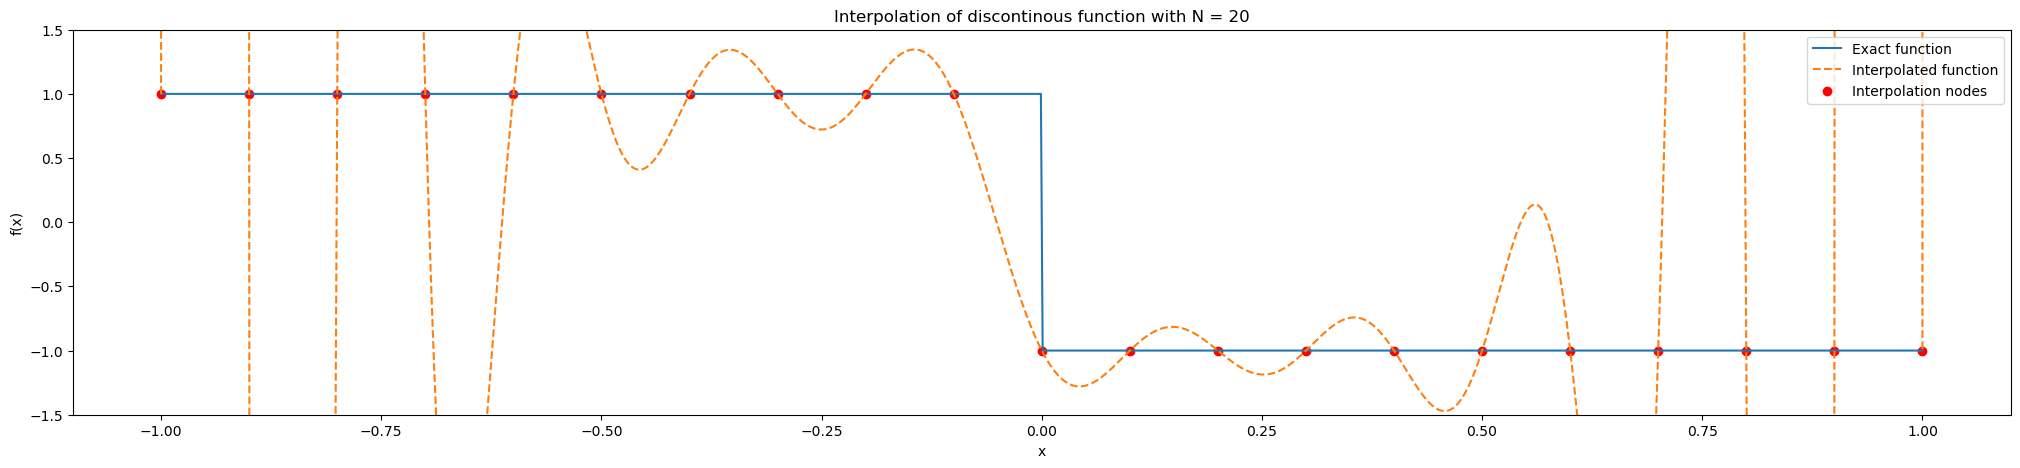

In [59]:
def f_d(x):
    x = np.asarray(x)
    return np.where(x < 0, 1, -1)

goal_function = lambda x :f_d(x)

# Exact function
M = 1000
xi = np.linspace(-1,1,M)
fexact = goal_function(xi)

# Known data given at N points
N = 20
x = np.linspace(-1,1,N+1)
f = goal_function(x)

# Compute the Lagrange polynomials for getting the approximation of the exact function
# Using the known data, we can compute the Lagrange polynomials of order N at M points xi
fN, ln = Ln(N, M, x, xi, f)

plt.figure(figsize=(25, 5))
plt.plot(xi, fexact, label='Exact function')
plt.plot(xi, fN, label='Interpolated function', linestyle='--')
plt.scatter(x, f, color='red', label='Interpolation nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(min(fexact) - 0.5, max(fexact) + 0.5)
plt.title(f'Interpolation of discontinous function with N = {N}')
plt.legend()
plt.show()